In [ ]:
# Machine Learning Homework 2 part 1 "Regression"

In [ ]:
#Importing the necessary libraries
import rfpimp
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.compose import make_column_transformer, make_column_selector ,ColumnTransformer
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.pipeline import Pipeline,make_pipeline
from sklearn.feature_selection import SelectKBest
from sklearn.linear_model import LinearRegression,Ridge,Lasso,ElasticNet
from sklearn.model_selection import GridSearchCV,cross_val_score,cross_val_predict,cross_validate,train_test_split, KFold,cross_validate
import warnings
warnings.filterwarnings('ignore')
from numpy import mean,std,absolute
import statsmodels.api as sm
from sklearn.metrics import r2_score 

In [2]:
#Loading the Dataset
df=pd.read_csv('data.csv')

#printing information about our dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

In [3]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [4]:
#Descriptive statistics

df.describe(include='all')

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
count,4600,4.600000e+03,4600.000000,4600.000000,4600.000000,4.600000e+03,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600,4600,4600,4600
unique,70,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4525,44,77,1
top,2014-06-23 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2520 Mulberry Walk NE,Seattle,WA 98103,USA
freq,142,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,1573,148,4600
mean,NaN,5.519630e+05,3.400870,2.160815,2139.346957,1.485252e+04,1.512065,0.007174,0.240652,3.451739,1827.265435,312.081522,1970.786304,808.608261,NaN,NaN,NaN,NaN
std,NaN,5.638347e+05,0.908848,0.783781,963.206916,3.588444e+04,0.538288,0.084404,0.778405,0.677230,862.168977,464.137228,29.731848,979.414536,NaN,NaN,NaN,NaN
min,NaN,0.000000e+00,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000,NaN,NaN,NaN,NaN
25%,NaN,3.228750e+05,3.000000,1.750000,1460.000000,5.000750e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000,NaN,NaN,NaN,NaN
50%,NaN,4.609435e+05,3.000000,2.250000,1980.000000,7.683000e+03,1.500000,0.000000,0.000000,3.000000,1590.000000,0.000000,1976.000000,0.000000,NaN,NaN,NaN,NaN
75%,NaN,6.549625e+05,4.000000,2.500000,2620.000000,1.100125e+04,2.000000,0.000000,0.000000,4.000000,2300.000000,610.000000,1997.000000,1999.000000,NaN,NaN,NaN,NaN


In [5]:
#Missing values?

df.isnull().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
country          0
dtype: int64

array([[<AxesSubplot:title={'center':'price'}>,
        <AxesSubplot:title={'center':'bedrooms'}>,
        <AxesSubplot:title={'center':'bathrooms'}>,
        <AxesSubplot:title={'center':'sqft_living'}>],
       [<AxesSubplot:title={'center':'sqft_lot'}>,
        <AxesSubplot:title={'center':'floors'}>,
        <AxesSubplot:title={'center':'waterfront'}>,
        <AxesSubplot:title={'center':'view'}>],
       [<AxesSubplot:title={'center':'condition'}>,
        <AxesSubplot:title={'center':'sqft_above'}>,
        <AxesSubplot:title={'center':'sqft_basement'}>,
        <AxesSubplot:title={'center':'yr_built'}>],
       [<AxesSubplot:title={'center':'yr_renovated'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

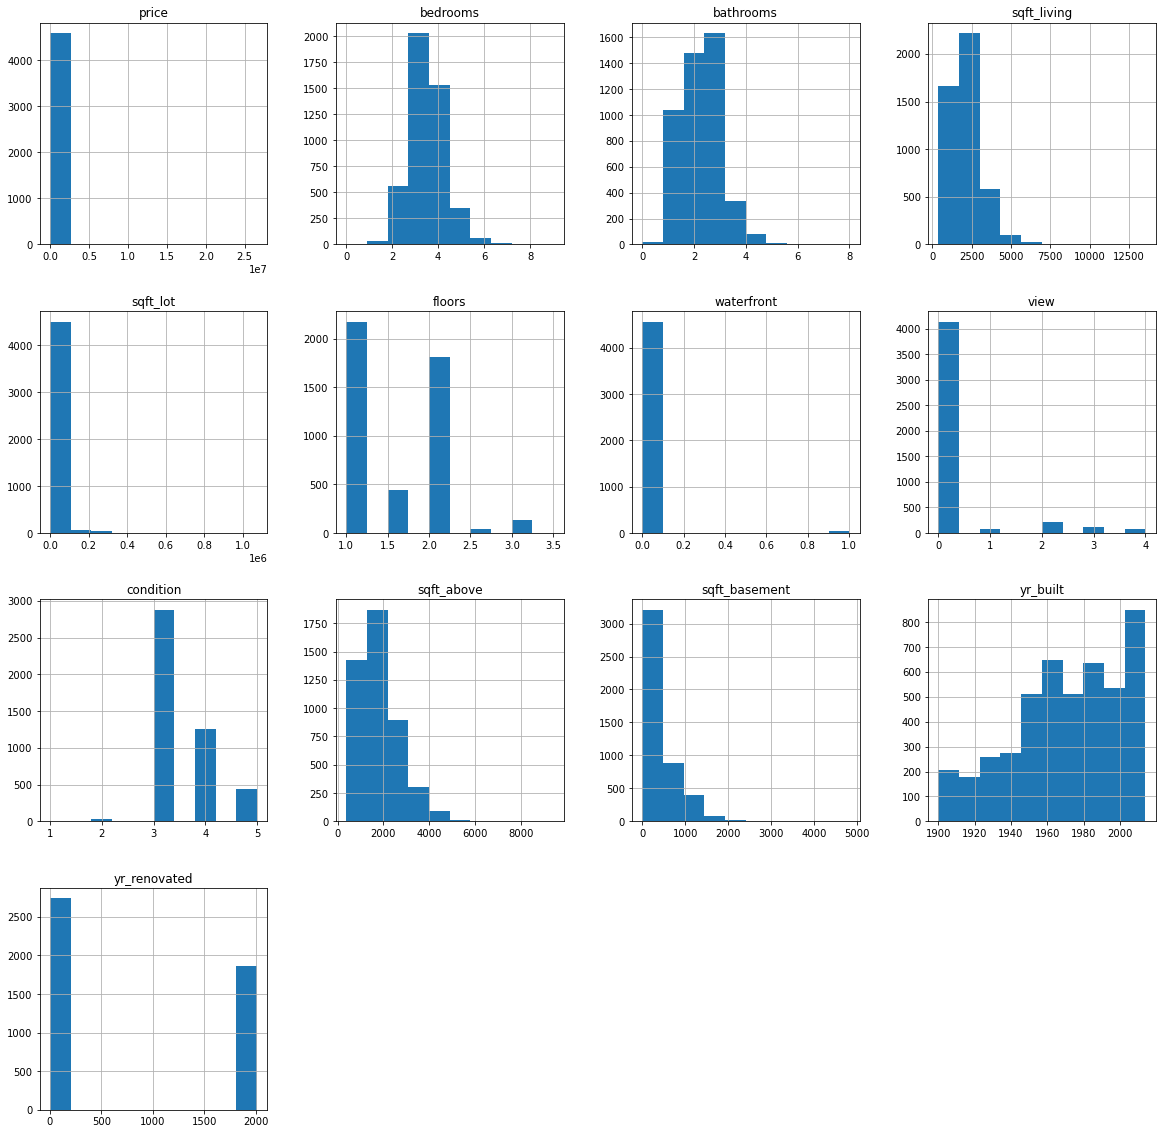

In [6]:
#Plotting the distribution

df.hist(figsize=(20,20))

<AxesSubplot:xlabel='price'>

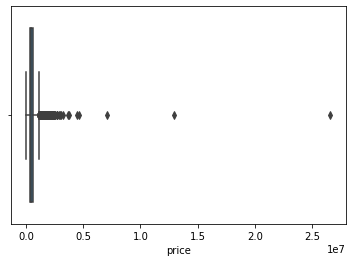

In [7]:
#From the boxplot and histogram above, there seem to be outliers in price values
sns.boxplot(df['price'])

In [8]:
#Removing outliers in price

upper_limit = df['price'].mean() + 3*df['price'].std()
lower_limit = df['price'].mean() - 3*df['price'].std()

df['price'] = np.where(
    df['price']>upper_limit,
    upper_limit,
    np.where(
        df['price']<lower_limit,
        lower_limit,
        df['price']
    )
)

<AxesSubplot:xlabel='price'>

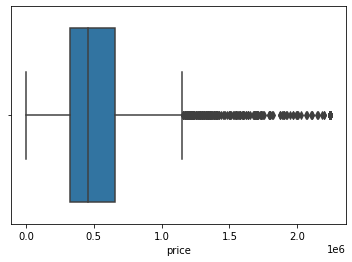

In [9]:
# Price after removing outliers
sns.boxplot(df['price'])

<AxesSubplot:xlabel='price', ylabel='Count'>

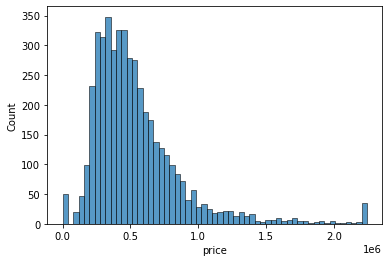

In [10]:
sns.histplot(df['price'])

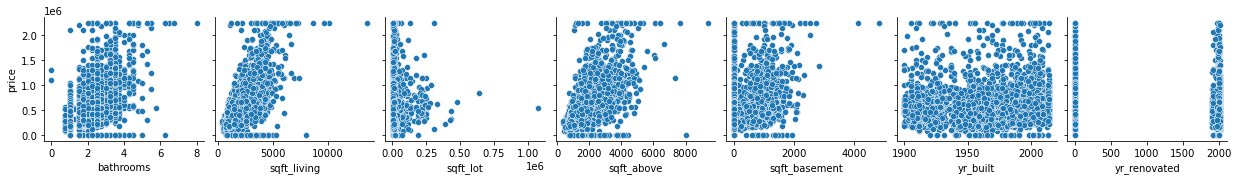

In [11]:
#plotting the dependency betweeen all continous variables and the target variable 'price'

sns.pairplot(data=df
             ,y_vars=['price']
             ,x_vars=['bathrooms','sqft_living','sqft_lot','sqft_above','sqft_basement','yr_built','yr_renovated'])

In [12]:
#Seprating Target from the rest of the Dataframe

X = df.drop(['price'], axis=1)
y=df['price']

In [13]:
#Train Test split

X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [14]:
#Identifying cloumn types

numerical_ix = X.select_dtypes(include=['int64', 'float64']).columns
categorical_ix = X.select_dtypes(include=['object', 'bool']).columns

In [15]:
#Column Transformer 1
#  One Hot Encoder for Categorical variables

t = [('cat', OneHotEncoder(handle_unknown='ignore'), categorical_ix)]
col_transform = ColumnTransformer(transformers=t,remainder='passthrough')

#Column Transformer 2
#  One Hot Encoder for Categorical variables
#  Standard Scalar for Numerical variables

t = [('cat1', OneHotEncoder(handle_unknown='ignore'), categorical_ix)
    ,('cat2', StandardScaler(), numerical_ix)]
col_transform2 = ColumnTransformer(transformers=t,remainder='passthrough')

#Transforming columns

X_train_=col_transform.fit_transform(X_train)
X_test_=col_transform.transform(X_test)

In [16]:
#Defining The regression models used

reg1=LinearRegression()
reg2=Ridge()
reg3=Lasso()
reg4=ElasticNet()

In [17]:
#Cross Validation of OLS 
score= cross_val_score(reg1,X_train_, y_train, cv=5,scoring='r2')
print("Cross validarion scores of",reg1,score,
      "with %0.0f accuracy" % (100*score.mean()))

Cross validarion scores of LinearRegression() [0.72958289 0.66058584 0.6411326  0.75427029 0.74430355] with 71 accuracy


In [18]:

def R(variables:list):
    R2_score = {}
    for i in variables:
        #create one-hot encoding
        cat_variables = X_train[i]
        X_train_encod = pd.get_dummies(cat_variables)
        #fit linear regression
        reg = LinearRegression().fit(X_train_encod, y_train)
        #cross-validation to caculate R^2
        train_scores = cross_val_score(reg, X_train_encod, y_train, cv=10 ,scoring='r2')
        mean_R2 = np.mean(train_scores)
        R2_score[i] = mean_R2
    return R2_score


In [19]:

categorical = df.dtypes == object

#return the contents of column as list
col  = df.columns.tolist()

# convert categorical variables to list 
cat_to_list = categorical.tolist()

# if categorical variables take the contents form the column and add to categorical_list
categorical_list = []
i=0
for item in cat_to_list:
    if item == True:
        categorical_list.append(col[i])
    i+=1

In [20]:
R2_score = R(categorical_list)
# show the result of R^2 for each categorical variable 
R2_score

best_R = sorted(R2_score, key=R2_score.get, reverse=True)[:3]
for i in best_R:
    print(i,R2_score[i])

country -0.002380709416901272
statezip -2.0975306978972655e+22
date -4.801256475167943e+23


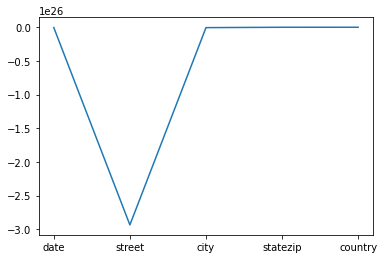

In [21]:
names = list(R2_score.keys())
values = list(R2_score.values())
plt.plot(names,values)


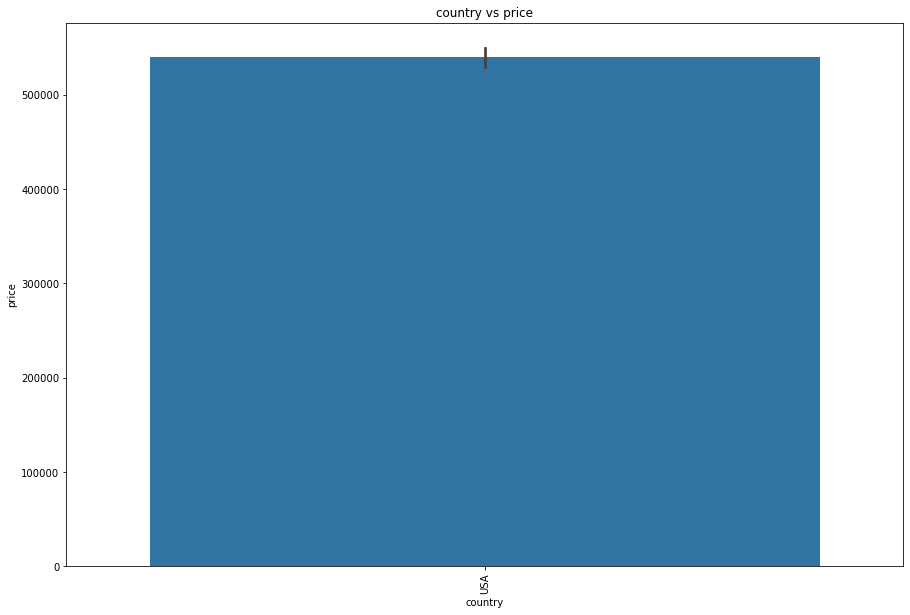

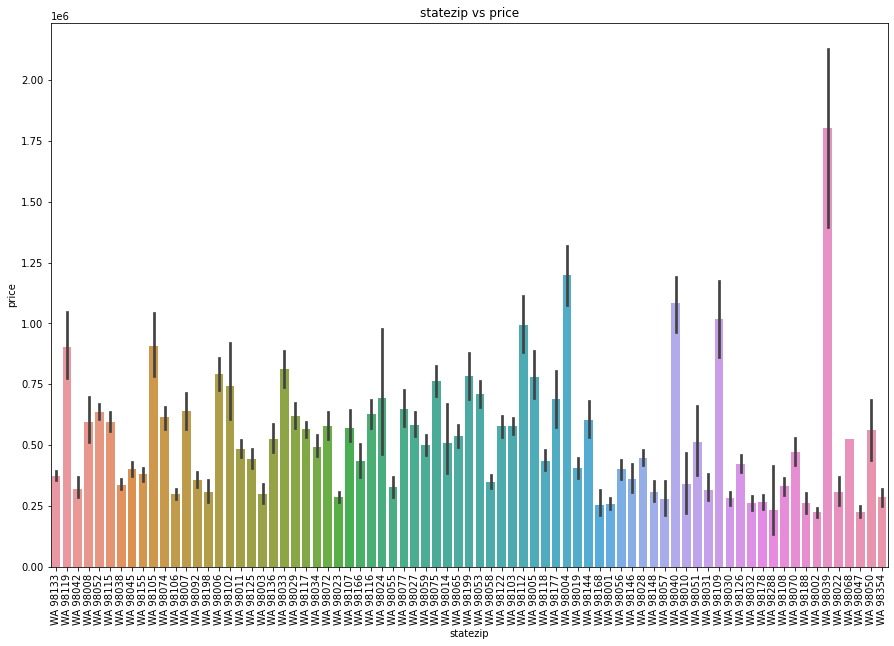

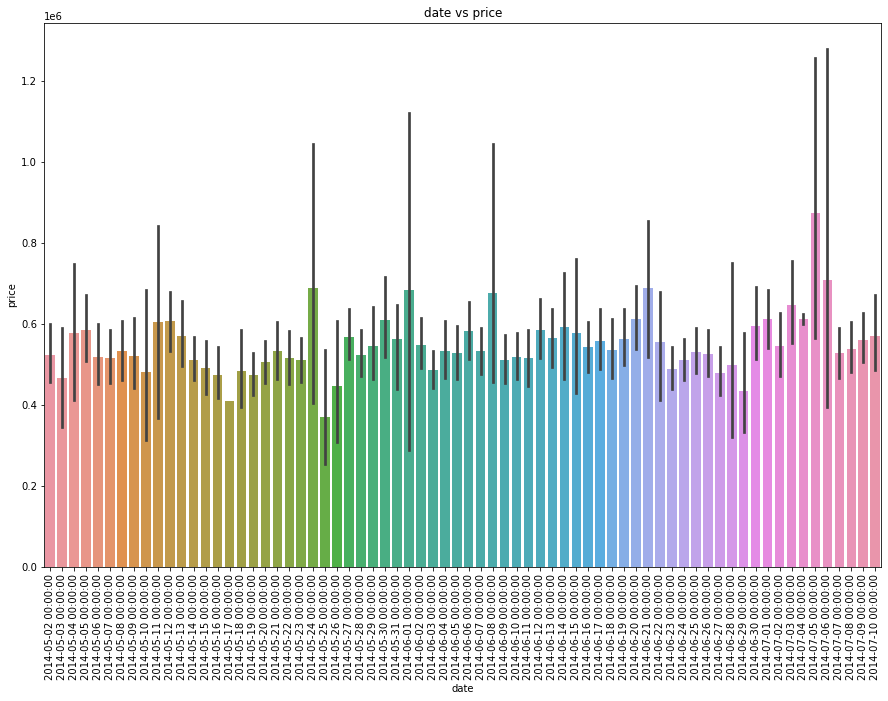

In [85]:
#Plotting the relationship of the categorical variables that provide the best R^2 value with the target
for i in best_R:
    fig, ax =plt.subplots()
    fig.set_figheight(10)
    fig.set_figwidth(15)
    sns.barplot(x=df[i], y=df['price'])
    plt.xticks(rotation=90)
    plt.title(f'{i} vs price')
    fig.show()

In [23]:
# Cross validation with the default parameters and only One Hut Encoder

pipe1=Pipeline([('preprocess',col_transform),('regressor',reg1)])
score1= cross_val_score(pipe1, X_train, y_train, cv=5)
y_pred1=cross_val_predict(pipe1,X_test,y_test)
print("Cross validation of",reg1,
      " %0.2f accuracy with a standard deviation of %0.2f \n" % (score1.mean(), score1.std()))

pipe2=Pipeline([('preprocess',col_transform),('regressor',reg2)])
score2= cross_val_score(pipe2, X_train, y_train, cv=5)
y_pred2=cross_val_predict(pipe2,X_test,y_test)
print("Cross validation of",reg2,
      " %0.2f accuracy with a standard deviation of %0.2f \n" % (score2.mean(), score2.std()))

pipe3=Pipeline([('preprocess',col_transform),('regressor',reg3)])
score3= cross_val_score(pipe3, X_train, y_train, cv=5)
y_pred3=cross_val_predict(pipe3,X_test,y_test)
print("Cross validation of",reg3,
      "%0.2f accuracy with a standard deviation of %0.2f \n" % (score3.mean(), score3.std()))

pipe4=Pipeline([('preprocess',col_transform),('regressor',reg4)])
score4= cross_val_score(pipe4, X_train, y_train, cv=5)
y_pred4=cross_val_predict(pipe4,X_test,y_test)
print("Cross validation of",reg4,
      " %0.2f accuracy with a standard deviation of %0.2f" % (score4.mean(), score4.std()))


Cross validation of LinearRegression()  0.71 accuracy with a standard deviation of 0.05 

Cross validation of Ridge()  0.71 accuracy with a standard deviation of 0.04 

Cross validation of Lasso() 0.69 accuracy with a standard deviation of 0.05 

Cross validation of ElasticNet()  0.55 accuracy with a standard deviation of 0.04


In [24]:
# Cross validation with the default parameters 
#One Hut Encoder and StandardScalar 

pipe1=Pipeline([('preprocess',col_transform2),('regressor',reg1)])
score1_2= cross_val_score(pipe1, X_train, y_train, cv=5)
y_pred1=cross_val_predict(pipe1,X_test,y_test)
print("Cross validation of",reg1,
      " %0.2f accuracy with a standard deviation of %0.2f \n" % (score1.mean(), score1.std()))

pipe2=Pipeline([('preprocess',col_transform2),('regressor',reg2)])
score2_2= cross_val_score(pipe2, X_train, y_train, cv=5)
y_pred2=cross_val_predict(pipe2,X_test,y_test)
print("Cross validation of",reg2,
      " %0.2f accuracy with a standard deviation of %0.2f \n" % (score2.mean(), score2.std()))

pipe3=Pipeline([('preprocess',col_transform2),('regressor',reg3)])
score3_2= cross_val_score(pipe3, X_train, y_train, cv=5)
y_pred3=cross_val_predict(pipe3,X_test,y_test)
print("Cross validation of",reg3,
      "%0.2f accuracy with a standard deviation of %0.2f \n" % (score3.mean(), score3.std()))

pipe4=Pipeline([('preprocess',col_transform2),('regressor',reg4)])
score4_2= cross_val_score(pipe4, X_train, y_train, cv=5)
y_pred4=cross_val_predict(pipe4,X_test,y_test)
print("Cross validation of",reg4,
      " %0.2f accuracy with a standard deviation of %0.2f" % (score4.mean(), score4.std()))


Cross validation of LinearRegression()  0.71 accuracy with a standard deviation of 0.05 

 Cross validation of Ridge()  0.71 accuracy with a standard deviation of 0.04 

Cross validation of Lasso() 0.69 accuracy with a standard deviation of 0.05 

Cross validation of ElasticNet()  0.55 accuracy with a standard deviation of 0.04


In [25]:
#Comparing the scores 
#We can clearly see that there isn't much difference 
#and in some cases the scores decreased slightly using StandardScalar

scores_ohe=[score1.mean(),score2.mean(),score3.mean(),score4.mean()]
scores_ohe_ss=[score1_2.mean(),score2_2.mean(),score3_2.mean(),score4_2.mean()]
print("Scores using only OneHutEncoder",scores_ohe)
print("OneHutEncoder & StandardScalar ",scores_ohe_ss)

Scores using only OneHutEncoder [0.7060180766672817, 0.7096612470889159, 0.6900327376363735, 0.5474015498724452]
OneHutEncoder & StandardScalar  [0.6389144413148644, 0.7091213195676065, 0.689719938416926, 0.5308202614850526]


In [26]:
#GridSearch Hyperparameter Tuning
#Ridge

param = {'regressor__alpha':  [0.0001, 0.001,0.01, 0.1, 1, 10]}

pipe_grid_tuning=Pipeline([('preprocess',col_transform),('regressor', reg2)])
grid_Ridge = GridSearchCV(pipe_grid_tuning,param,cv=3,scoring='r2').fit(X_train, y_train)

In [27]:
#GridSearch Hyperparameter Tuning
#Lasso

pipe_grid_tuning=Pipeline([('preprocess',col_transform),('regressor', reg3)])
grid_Lasso = GridSearchCV(pipe_grid_tuning,param,cv=3,scoring='r2').fit(X_train, y_train)

In [28]:
#GridSearch Hyperparameter Tuning
#ElasticNet

pipe_grid_tuning=Pipeline([('preprocess',col_transform),('regressor', reg4)])
grid_ENet = GridSearchCV(pipe_grid_tuning,param,cv=3,scoring='r2').fit(X_train, y_train)

In [29]:
#Comparing Results
#There isnt much difference between the models

print(reg2,grid_Ridge.best_params_,
      "\n    Score: %0.2f" %(100*grid_Ridge.best_score_))

print(reg3,grid_Lasso.best_params_,
      "\n    Score:%0.2f" %(100*grid_Lasso.best_score_))

print(reg4,grid_ENet.best_params_,
      "\n    Score:%0.2f" %(100*grid_ENet.best_score_))

Ridge() {'regressor__alpha': 1} 
    Score: 70.90
Lasso() {'regressor__alpha': 10} 
    Score:71.97
ElasticNet() {'regressor__alpha': 0.001} 
    Score:70.90


In [30]:
#Building the best models 

Ols=LinearRegression().fit(X_train_,y_train)
pred1=Ols.predict(X_test_)
r2_Ols=r2_score(y_test,pred1)

ridge=Ridge(alpha=1).fit(X_train_,y_train)
pred2=ridge.predict(X_test_)
r2_ridge=r2_score(y_test,pred2)

lasso=Lasso(alpha=10).fit(X_train_,y_train)
pred3=lasso.predict(X_test_)
r2_lasso=r2_score(y_test,pred3)

ENet=ElasticNet(alpha= 0.001).fit(X_train_,y_train)
pred4=ENet.predict(X_test_)
r2_ENet=r2_score(y_test,pred4)

In [31]:
#Comparing Results
#LinearRegression and Lasso seem to be doing the best on training but in testing all models performed merely the same
#and those testing results might indicate an overfitting


print(Ols,
      "\n   Training Score: %0.2f" %(100*Ols.score(X_train_, y_train))
      ,"    Testing Score  : %0.02f\n" % (100*r2_Ols))


print(ridge,
      "\n   Training Score: %0.2f" %(100*ridge.score(X_train_, y_train))
      ,"    Testing Score  : %0.02f\n" % (100*r2_ridge))

print(lasso,
      "\n   Training Score:%0.2f" %(100*lasso.score(X_train_, y_train))
      ,"    Testing Score  : %0.02f\n" % (100*r2_lasso))

print(ENet,
      "\n   Training Score:%0.2f" %(100*ENet.score(X_train_, y_train))
      ,"    Testing Score  : %0.02f\n" % (100*r2_ENet))


LinearRegression() 
   Training Score: 99.69     Testing Score  : 61.88

Ridge(alpha=1) 
   Training Score: 93.57     Testing Score  : 61.99

Lasso(alpha=10) 
   Training Score:99.01     Testing Score  : 61.98

ElasticNet(alpha=0.001) 
   Training Score:89.25     Testing Score  : 62.01



In [32]:
#Building a columns Transformer for OneHotEncoder and getting the features names

col_transform = ColumnTransformer([('ohe', OneHotEncoder(handle_unknown='ignore'), categorical_ix)],remainder='passthrough')

col_transform.fit_transform(X_train)

features = col_transform.named_transformers_['ohe'].get_feature_names()
cat = features.tolist()

numerical = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',  
                  'condition', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated']  


In [76]:
#Getting the Ridge Regression coefficients

Ridge_coefficients = grid_Ridge.best_estimator_.named_steps['regressor'].coef_
Ridge_feature_names = numerical + cat
Ridge_feature_importance = dict(zip(Ridge_feature_names, Ridge_coefficients))

Ridge_top_scores = sorted(Ridge_feature_importance, key=Ridge_feature_importance.get, reverse=True)

Ridge_names = []
Ridge_values = []
for col in Ridge_top_scores[:20]:
    Ridge_names.append(col)
    Ridge_values.append(Ridge_feature_importance[col])


In [77]:
#Getting the Lasso Regression coefficients

Lasso_coefficients = grid_Lasso.best_estimator_.named_steps['regressor'].coef_
Lasso_feature_names = numerical + cat
Lasso_feature_importance = dict(zip(Lasso_feature_names, Lasso_coefficients))
Lasso_top_scores = sorted(Lasso_feature_importance, key=Lasso_feature_importance.get, reverse=True)

Lasso_names = []
Lasso_values = []
for col in Lasso_top_scores[:20]:
    Lasso_names.append(col)
    Lasso_values.append(Lasso_feature_importance[col])


In [80]:
#Getting the Elastic Net Regression coefficients

Elastic_net_coefficients = grid_ENet.best_estimator_.named_steps['regressor'].coef_
Elastic_net_feature_names = numerical + cat
Elastic_net_feature_importance = dict(zip(Elastic_net_feature_names, Elastic_net_coefficients))
Elastic_net_top_scores = sorted(Elastic_net_feature_importance, key=Elastic_net_feature_importance.get, reverse=True)

Elastic_net_names = []
Elastic_net_values = []
for col in Elastic_net_top_scores[:20]:
    Elastic_net_names.append(col)
    Elastic_net_values.append(Elastic_net_feature_importance[col])


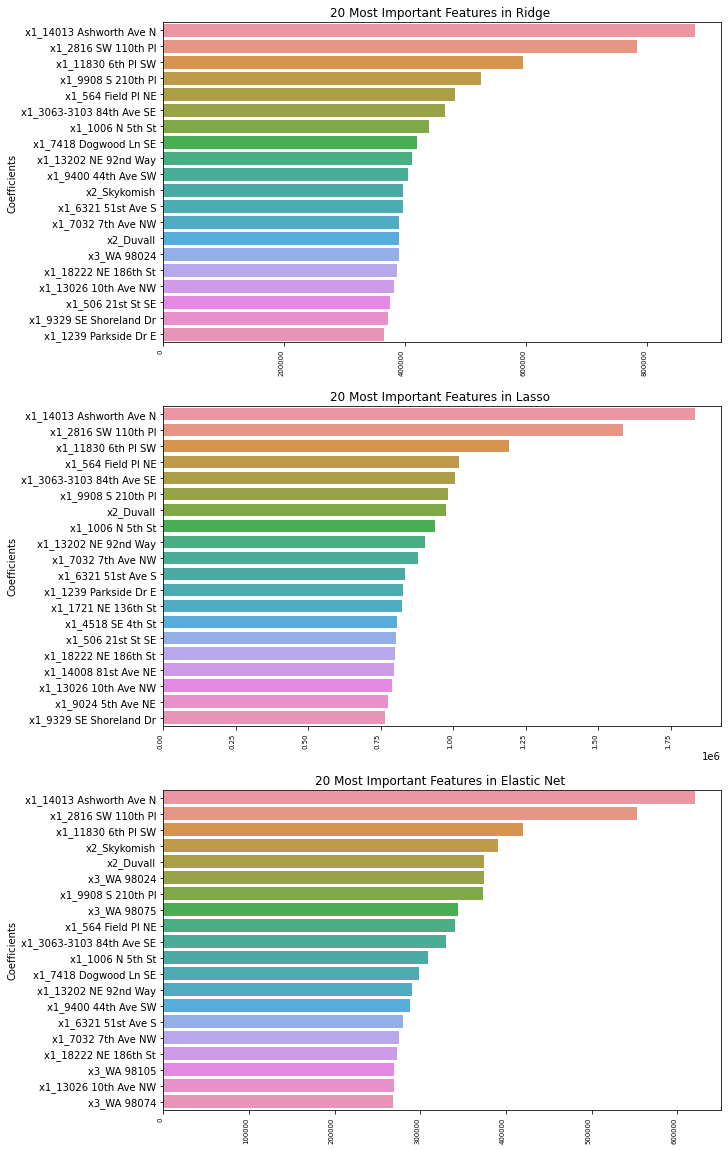

In [81]:
#20 Most Important in Regression Models

plt.figure(figsize=(10, 20))
#Ridge subplot
plt.subplot(3,1,1)
sns.barplot(x=ridge_values, y=ridge_names,orient='h')
plt.title('20 Most Important Features in Ridge ')
plt.xticks(rotation=90,  horizontalalignment='right',fontweight='light', fontsize='x-small',)
plt.ylabel('Coefficients')

#Lasso subplot
plt.subplot(3,1,2)
sns.barplot(x=lasso_values, y=lasso_names,orient='h')
plt.title('20 Most Important Features in Lasso ')
plt.xticks(rotation=90,  horizontalalignment='right',fontweight='light', fontsize='x-small',)
plt.ylabel('Coefficients')

#Elastic Net subplot
plt.subplot(3,1,3)
sns.barplot(x=Elastic_net_values, y=Enet_names,orient='h')
plt.title('20 Most Important Features in Elastic Net ')
plt.xticks(rotation=90,  horizontalalignment='right',fontweight='light', fontsize='x-small',)
plt.ylabel('Coefficients')
plt.show()